# Houses Kaggle Competition (revisited with Deep Learning 🔥) 

[<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/ML/kaggle-batch-challenge.png' width=600>](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

⚙️ Let's re-use our previous **pipeline** built in the module **`05-07-Ensemble-Methods`** and try to improve our final predictions with a Neural Network!

## (0) Libraries and imports

In [1]:
%load_ext autoreload
%autoreload 2

# DATA MANIPULATION
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# VIEWING OPTIONS IN THE NOTEBOOK
from sklearn import set_config; set_config(display='diagram')

## (1) 🚀 Getting Started

### (1.1) Load the datasets

💾 Let's load our **training dataset**

In [2]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv")
X = data.drop(columns='SalePrice')
y = data['SalePrice']

In [8]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,2

In [4]:
X.shape, y.shape

((1460, 80), (1460,))

💾 Let's also load the **test set**

❗️ Remember ❗️ You have access to `X_test` but only Kaggle has `y_test`

In [5]:
X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")

In [6]:
X_test.shape

(1459, 80)

In [7]:
X_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,Hd

### (1.2) Train/Val Split

❓ **Holdout** ❓ 

As you are not allowed to use the test set (and you don't have access to `y_test` anyway), split your dataset into a training set and a validation set.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape


((1168, 80), (292, 80), (1168,), (292,))

### (1.3) Import the preprocessor

🎁 You will find in `utils/preprocessor.py` the **`data-preprocessing pipeline`** that was built in our previous iteration.

❓ Run the cell below, and make sure you understand what the pipeline does. Look at the code in `preprocessor.py` ❓

In [13]:
from utils.preprocessor import create_preproc

preproc = create_preproc(X_train)
preproc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'BsmtUnfSF',
                                                   'EnclosedPorch',
                                                   'Fireplaces', 'FullBath',
                                                   'GarageArea', 'GarageCars...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x17c224720>))])

❓ **Scaling your numerical features and encoding the categorical features** ❓

Apply these transformations to _both_ your training set and your validation set.

In [15]:
X_train_prep = preproc.fit_transform(X_train, y_train)
X_val_prep = preproc.transform(X_val)

X_train_prep.shape, X_val_prep.shape

((1168, 161), (292, 161))

## (2) 🔮 Your predictions in Tensorflow/Keras

🚀 This is your first **regression** task with Keras! 

💡 Here a few tips to get started:
- Kaggle's [rule](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) requires to minimize **`rmsle`** (Root Mean Square Log Error). 
    - As you can see, we can specify `msle` directly as a loss-function with Tensorflow.Keras!
    - Just remember to take the square-root of your loss results to read your rmsle metric.
    
    
😃 The best boosted-tree ***rmsle*** score to beat is around ***0.13***

---

<img src="https://i.pinimg.com/564x/4c/fe/ef/4cfeef34af09973211f584e8307b433c.jpg" alt="`Impossible mission" style="height: 300px; width:500px;"/>

---


❓ **Your mission, should you choose to accept it:** ❓
- 💪 Beat the best boosted-tree 💪 

    - Your responsibilities are:
        - to build the ***best neural network architecture*** possible,
        - and to control the number of epochs to ***avoid overfitting***.

### (2.1) Predicting the houses' prices using a Neural Network

❓ **Preliminary Question: Initializing a Neural Network** ❓

Create a function `initialize_model` which initializes a Dense Neural network:
- You are responsible for designing the architecture (number of layers, number of neurons)
- The function should also compile the model with the following parameters:
    - ***optimizer = "adam"***
    - ***loss = "msle"*** (_Optimizing directly for the Squared Log Error!_)
        

In [18]:

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Input(shape=(161,)),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(1)
])

❓ **Questions/Guidance** ❓

1. Initialize a Neural Network
2. Train it
3. Evaluate its performance
4. Is the model overfitting the dataset? 

In [19]:
model.compile(optimizer = 'adam', loss = 'msle', metrics = ['mae'])
model.summary()
            

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,737 (10.69 KB)

 Trainable params: 2,737 (10.69 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(
    X_train_prep, y_train,
    validation_data = (X_val_prep, y_val),
    epochs = 100,
    batch_size = 32,
    verbose = 1
)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6809 - mae: 173814.3438 - val_loss: 9.4655 - val_mae: 171166.5469
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5381 - mae: 173635.4219 - val_loss: 9.3248 - val_mae: 170987.2812
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3973 - mae: 173453.9375 - val_loss: 9.1862 - val_mae: 170805.0469
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2584 - mae: 173269.3438 - val_loss: 9.0498 - val_mae: 170620.2500
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.1217 - mae: 173081.7812 - val_loss: 8.9149 - val_mae: 170431.8281
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.9867 - mae: 172891.1562 - val_loss: 8.7821 - val_mae: 170240.7188
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.8536 - mae: 172697.4844 - val_loss: 8.6514 - val_mae: 170046.8438
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7224 - mae: 172500.5469 - val_loss: 8.5222 - val_m

🎁 We coded a `plot_history` function that you can use to detect overfitting

In [21]:
def plot_history(history):
    plt.plot(np.sqrt(history.history['loss']))
    plt.plot(np.sqrt(history.history['val_loss']))
    plt.title('Model Loss')
    plt.ylabel('RMSLE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

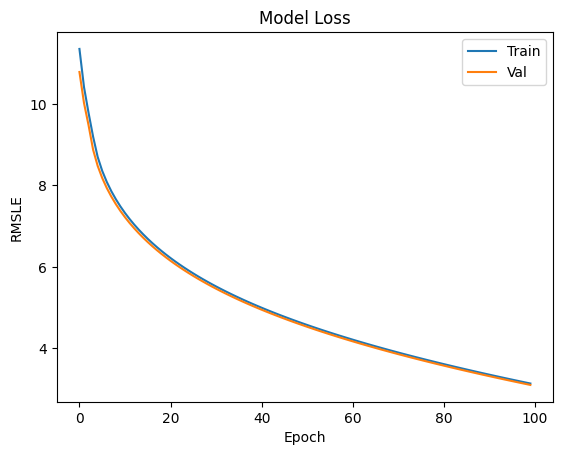

In [22]:
plot_history(history)

In [ ]:
h

### (2.2) Challenging yourself

🤔 **Questions to challenge yourself:**
- Are you satisfied with your score?
- Before publishing it, ask yourself whether you could really trust it or not?
- Have you cross-validated your neural network? 
    - Feel free to cross-validate it manually with a *for loop* in Python to make sure that your results are robust against the randomness of a _train-val split_ before before submitting to Kaggle

❓ Create a function `evaluate_model` following the framework below 👇 then use a for loop with `KFold` to manually cross validate your model!

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
   rmsle_final_epoch  rmsle_min
0           0.199094   0.199094
1           0.199535   0.199535
2           0.183808   0.183808
3           0.212315   0.212315
4           0.185942   0.185942
Moyenne RMSLE: 0.19613882832789803


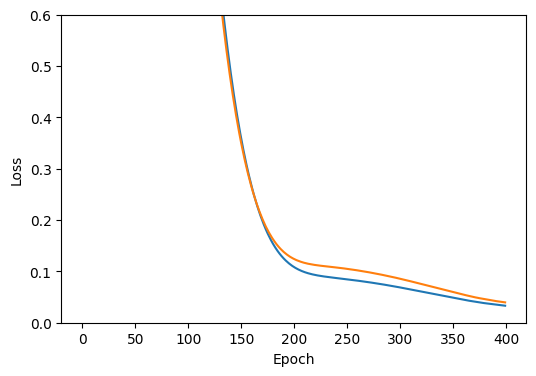

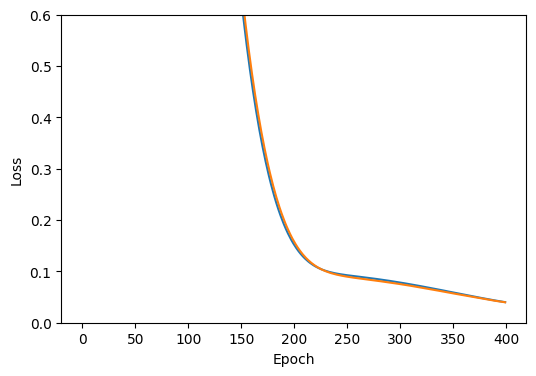

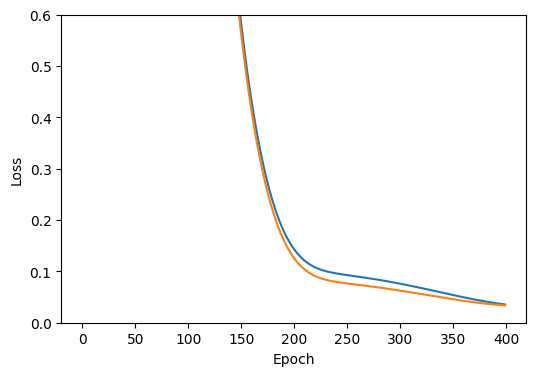

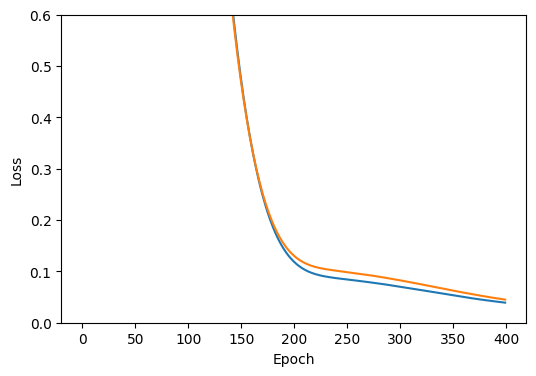

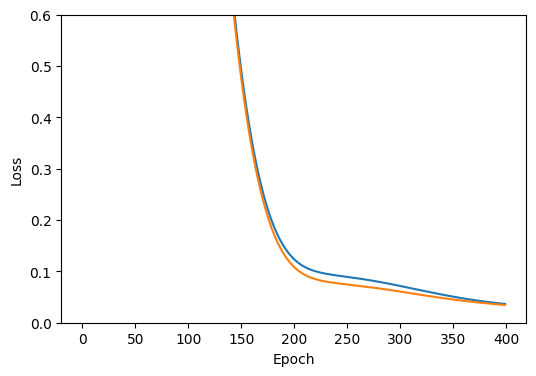

In [32]:
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers
from sklearn.model_selection import KFold
from utils.preprocessor import create_preproc
import matplotlib.pyplot as plt

def evaluate_model(X, y, train_index, val_index):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    preproc = create_preproc(X_train)
    X_train_prep = preproc.fit_transform(X_train, y_train)
    X_val_prep = preproc.transform(X_val)

    model = models.Sequential([
        layers.Input(shape=(X_train_prep.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='msle', metrics=['mae'])

    history = model.fit(
        X_train_prep, y_train,
        validation_data=(X_val_prep, y_val),
        epochs=400,
        batch_size=32,
        verbose=0
    )

    rmsle_final = np.sqrt(history.history['val_loss'][-1])
    rmsle_min = np.sqrt(np.min(history.history['val_loss']))

    plt.figure(figsize=(6,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, 0.6)

    
    return pd.DataFrame({
        'rmsle_final_epoch': [rmsle_final],
        'rmsle_min': [rmsle_min]
    })


kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), 1):
    print(f"Fold {fold}")
    score = evaluate_model(X, y, train_idx, val_idx)
    scores.append(score)

results = pd.concat(scores).reset_index(drop=True)
print(results)
print("Moyenne RMSLE:", results["rmsle_min"].mean())



### (2.3) (Bonus) Using all your CPU cores to run Neural Networks

🔥 **BONUS** 🔥 **Multiprocessing computing using [dask](https://docs.dask.org/en/latest/delayed.html)** and **all your CPU cores**:

_(to mimic SkLearn's `n_jobs=-1`)_

In [ ]:
!pip install --quiet dask

In [ ]:
from sklearn.model_selection import KFold
from dask import delayed

# cv = 5
# kf = KFold(n_splits = cv, shuffle = True)
# f = delayed(evaluate_model)

# results = delayed([f(X, y, train_index, val_index) for (train_index, val_index) in kf.split(X)
#                   ]).compute(
#                       scheduler='processes', num_workers=8)

# pd.concat(results, axis=0).reset_index(drop=True)

### (2.4) (Bonus) Multiprocessing with Python


**multiprocessing with default Python library**

References :
* [Yitong Ren - Speeding Up and Perfecting Your Work Using Parallel Computing](https://medium.com/towards-data-science/speeding-up-and-perfecting-your-work-using-parallel-computing-8bc2f0c073f8)
* [Johaupt Github - Parallel Processing for Cross Validation](https://johaupt.github.io/blog/multiprocessing_cross_validation.html)

In [ ]:
# This code will fail try to debug it yourself if you cannot checkout the hints below
import multiprocessing as mp
pool = mp.Pool(processes=2) #mp.cpu_count()-1)

results = []
def log_result(x):
    results.append(x)

for train_index, val_index in kf.split(X):
    pool.apply_async(
        evaluate_model,
        args=(X, y, train_index, val_index),
        callback=log_result)

# Close the pool for new tasks
pool.close()

# Wait for all tasks to complete at this point
pool.join()

result = pd.concat(results, axis=0)

<details>
    <summary markdown='span'>Hints</summary>

This is a limitation of multiprocessing in ipython enviroments this code would work fine in .py file.
The key error is `AttributeError: Can't get attribute 'evaluate_model' on <module 'main' (built-in)>`

Checkout this stackoverflow for a workaround https://stackoverflow.com/questions/41385708/multiprocessing-example-giving-attributeerror !
</details>

## (3) 🏅FINAL SUBMISSION

🦄 Predict the ***prices of the houses in your test set*** and submit your results to Kaggle! 



In [ ]:
# X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")
# X_test_preproc = preproc.transform(X_test)
# ALREADY DONE ABOVE

In [ ]:
# YOUR CODE HERE

💾 Save your predictions in a Dataframe called `results` with the format required by Kaggle so that when you export it to a `.csv`, Kaggle can read it.

In [ ]:
# YOUR CODE HERE

📤  Export your results using Kaggle's submission format and submit it online!

_(Uncomment the last cell of this notebook)_

In [ ]:
# results.to_csv("submission_final.csv", header=True, index=False)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... it's time for the Recap!